In [115]:
import numpy as np
import pandas as pd
from skforecast.datasets import fetch_dataset

In [116]:
df = pd.read_csv('fc24_dataframe.csv')
df.head()

,card_id,name,rating,skill_moves,weak_foot,pace_m,acceleration,sprint_speed,shooting_m,att_position,...,accelerate,total_ingame_stats,card_page_url,nation,league,club,intl_rep,date,price,positions
0,1,Alex Scott,88,3,4,89,90.0,89.0,73,72.0,...,Controlled Explosive,2361,https://www.futbin.com/24/player/1/alex-scott,England,Barclays WSL,HERO,3.0,2023-11-26,0,"['RB', 'RWB']"
1,1,Alex Scott,88,3,4,89,90.0,89.0,73,72.0,...,Controlled Explosive,2361,https://www.futbin.com/24/player/1/alex-scott,England,Barclays WSL,HERO,3.0,2023-11-27,0,"['RB', 'RWB']"
2,1,Alex Scott,88,3,4,89,90.0,89.0,73,72.0,...,Controlled Explosive,2361,https://www.futbin.com/24/player/1/alex-scott,England,Barclays WSL,HERO,3.0,2023-11-28,0,"['RB', 'RWB']"
3,1,Alex Scott,88,3,4,89,90.0,89.0,73,72.0,...,Controlled Explosive,2361,https://www.futbin.com/24/player/1/alex-scott,England,Barclays WSL,HERO,3.0,2023-11-29,0,"['RB', 'RWB']"
4,1,Alex Scott,88,3,4,89,90.0,89.0,73,72.0,...,Controlled Explosive,2361,https://www.futbin.com/24/player/1/alex-scott,England,Barclays WSL,HERO,3.0,2023-11-30,0,"['RB', 'RWB']"


In [117]:
df = df.sort_values(['card_id', 'date']).reset_index(drop=True)  # Sort by card_id and date

In [ ]:
df.head(300)

In [112]:
# Define attacker positions
attacker_positions = ['ST', 'LW', 'RW', 'CF']

# Filter dataset for attackers
attackers = df[df['positions'].apply(lambda pos_list: any(pos in attacker_positions for pos in eval(pos_list)))]

In [124]:
attackers = df

In [125]:
attackers = attackers.drop('name', axis=1)
attackers = attackers.drop('acceleration', axis=1)
attackers = attackers.drop('sprint_speed', axis=1)
attackers = attackers.drop('att_position', axis=1)
attackers = attackers.drop('finishing', axis=1)
attackers = attackers.drop('shot_power', axis=1)
attackers = attackers.drop('long_shots', axis=1)
attackers = attackers.drop('volleys', axis=1)
attackers = attackers.drop('penalties', axis=1)
attackers = attackers.drop('vision', axis=1)
attackers = attackers.drop('crossing', axis=1)
attackers = attackers.drop('fk_accuracy', axis=1)
attackers = attackers.drop('short_pass', axis=1)
attackers = attackers.drop('long_pass', axis=1)
attackers = attackers.drop('curve', axis=1)
attackers = attackers.drop('agility', axis=1)
attackers = attackers.drop('balance', axis=1)
attackers = attackers.drop('reactions', axis=1)
attackers = attackers.drop('ball_control', axis=1)
attackers = attackers.drop('dribbling', axis=1)
attackers = attackers.drop('composure', axis=1)
attackers = attackers.drop('interceptions', axis=1)
attackers = attackers.drop('heading_acc', axis=1)
attackers = attackers.drop('def_aware', axis=1)
attackers = attackers.drop('stand_tackle', axis=1)
attackers = attackers.drop('slide_tackle', axis=1)
attackers = attackers.drop('jumping', axis=1)
attackers = attackers.drop('stamina', axis=1)
attackers = attackers.drop('strength', axis=1)
attackers = attackers.drop('aggression', axis=1)
attackers = attackers.drop('body_type', axis=1)
attackers = attackers.drop('accelerate', axis=1)
attackers = attackers.drop('card_page_url', axis=1)
attackers = attackers.drop('positions', axis=1)
attackers = attackers.drop('playstyles', axis=1)

In [126]:
attackers.columns

Index(['card_id', 'rating', 'skill_moves', 'weak_foot', 'pace_m', 'shooting_m',
       'passing_m', 'dribbling_m', 'defending_m', 'physical_m', 'height',
       'weight', 'total_ingame_stats', 'nation', 'league', 'club', 'intl_rep',
       'date', 'price'],
      dtype='object')

In [43]:
# Full list of playstyle columns
playstyle_columns = [
    'power_shot', 'dead_ball', 'chip_shot', 'finesse_shot', 'power_header',
    'pinged_pass', 'incisive_pass', 'long_ball_pass', 'tiki_taka', 'whipped_pass',
    'first_touch', 'flair', 'press_proven', 'rapid', 'technical', 'trickster',
    'block', 'bruiser', 'intercept', 'jockey', 'slide_tackle', 'anticipate',
    'acrobatic', 'aerial', 'trivela', 'relentless', 'quick_step', 'long_throw',
    # Discarding the last 6 (no need to name these since they are unnecessary)
]

# Define attacker-relevant playstyles
attacker_playstyle_columns = [
    'power_shot', 'dead_ball', 'finesse_shot', 'rapid', 'technical',
    'trickster', 'trivela', 'aerial', 'quick_step', 'whipped_pass'
]

# Expand the 'playstyles' column into individual binary columns
# Assuming 'playstyles' contains a string of binary digits corresponding to all playstyles
playstyles_split = attackers['playstyles'].apply(lambda x: list(map(int, x[:len(playstyle_columns)])))

# Create a DataFrame for all playstyles
playstyles_df = pd.DataFrame(playstyles_split.tolist(), columns=playstyle_columns)

# Filter only attacker-relevant playstyles
playstyles_df = playstyles_df[attacker_playstyle_columns]

# Reset indices for both DataFrames
playstyles_df = playstyles_df.reset_index(drop=True)
attackers = attackers.reset_index(drop=True)

# Concatenate attacker-relevant playstyles with the attackers DataFrame
attackers = pd.concat([attackers, playstyles_df], axis=1)

# Drop the original 'playstyles' column if no longer needed
attackers = attackers.drop(columns=['playstyles'])

In [127]:
# Ensure 'date' column is in datetime format
attackers['date'] = pd.to_datetime(attackers['date'])

# Get start and end dates of the game cycle
fc24_start_date = attackers['date'].min()
fc24_end_date = attackers['date'].max()

# Compute days_since_start and days_until_end based on FC24 game cycle
attackers['days_since_start'] = (attackers['date'] - fc24_start_date).dt.days
attackers['days_until_end'] = (fc24_end_date - attackers['date']).dt.days

# Get the first release date (earliest date) for each card_id
card_release_dates = attackers.groupby('card_id')['date'].min().rename('release_date')

# Merge release dates back into the DataFrame
attackers = attackers.merge(card_release_dates, on='card_id', how='left')

# Compute days_since_release for each card
attackers['days_since_release'] = (attackers['date'] - attackers['release_date']).dt.days

# Drop the 'release_date' column if it's no longer needed
attackers = attackers.drop(columns=['release_date'])

In [128]:
# Check the resulting DataFrame
print(attackers[['card_id', 'date', 'days_since_start', 'days_until_end', 'days_since_release']].head())

   card_id       date  days_since_start  days_until_end  days_since_release
0        1 2023-11-26                67             295                   0
1        1 2023-11-27                68             294                   1
2        1 2023-11-28                69             293                   2
3        1 2023-11-29                70             292                   3
4        1 2023-11-30                71             291                   4


In [129]:
# Remove rows with price = 0
attackers = attackers[attackers['price'] > 0].reset_index(drop=True)

# Check the remaining rows
print(f"Number of rows after removing 0 price: {len(attackers)}")

Number of rows after removing 0 price: 1069699


In [130]:
# Step 2: Sort and Prepare Data
attackers['date'] = pd.to_datetime(attackers['date'])  # Ensure date is datetime
attackers = attackers.sort_values(['card_id', 'date']).reset_index(drop=True)  # Sort by card_id and date

In [131]:
attackers.columns

Index(['card_id', 'rating', 'skill_moves', 'weak_foot', 'pace_m', 'shooting_m',
       'passing_m', 'dribbling_m', 'defending_m', 'physical_m', 'height',
       'weight', 'total_ingame_stats', 'nation', 'league', 'club', 'intl_rep',
       'date', 'price', 'days_since_start', 'days_until_end',
       'days_since_release'],
      dtype='object')

In [140]:
print(attackers.isnull().sum())

card_id                 0
rating                  0
skill_moves             0
weak_foot               0
pace_m                  0
shooting_m              0
passing_m               0
dribbling_m             0
defending_m             0
physical_m              0
height                  0
weight                  0
total_ingame_stats      0
nation                  0
league                  0
club                    0
intl_rep                0
date                    0
price                   0
days_since_start        0
days_until_end          0
days_since_release      0
price_lag_1             0
price_lag_7             0
price_rolling_mean_7    0
price_rolling_std_7     0
price_pct_change        0
dtype: int64


In [135]:
# Display rows with missing values for specific columns
missing_rows = attackers[attackers.isnull().any(axis=1)]
missing_rows

,card_id,rating,skill_moves,weak_foot,pace_m,shooting_m,passing_m,dribbling_m,defending_m,physical_m,...,total_ingame_stats,nation,league,club,intl_rep,date,price,days_since_start,days_until_end,days_since_release


In [ ]:
attackers['height'] = attackers['height'].fillna(attackers['height'].median())
attackers['nation'] = attackers['nation'].fillna('Unknown')
attackers['league'] = attackers['league'].fillna('Unknown')
attackers['club'] = attackers['club'].fillna('Unknown')
attackers['intl_rep'] = attackers['intl_rep'].fillna(1)

# playstyles_cols = ['rapid', 'technical', 'trickster', 'trivela', 'aerial', 'quick_step', 'whipped_pass']
# attackers[playstyles_cols] = attackers[playstyles_cols].fillna(0)

In [136]:
# Create lag features
attackers['price_lag_1'] = attackers.groupby('card_id')['price'].shift(1)
attackers['price_lag_7'] = attackers.groupby('card_id')['price'].shift(7)

In [137]:
# Create rolling mean and std features
attackers['price_rolling_mean_7'] = attackers.groupby('card_id')['price'].rolling(7).mean().reset_index(level=0, drop=True)
attackers['price_rolling_std_7'] = attackers.groupby('card_id')['price'].rolling(7).std().reset_index(level=0, drop=True)

In [138]:
# Calculate percentage change from the previous day
attackers['price_pct_change'] = attackers.groupby('card_id')['price'].pct_change()

In [139]:
# Handle missing values for lag features
attackers['price_lag_1'] = attackers['price_lag_1'].fillna(attackers['price'])
attackers['price_lag_7'] = attackers['price_lag_7'].fillna(attackers['price'])

# Handle missing values for rolling features
attackers['price_rolling_mean_7'] = attackers['price_rolling_mean_7'].fillna(attackers['price'])
attackers['price_rolling_std_7'] = attackers['price_rolling_std_7'].fillna(0)

# Handle missing values for percentage change
attackers['price_pct_change'] = attackers['price_pct_change'].fillna(0)

In [141]:
# Specify categorical columns
categorical_cols = ['nation', 'league', 'club']

# Convert to category dtype
for col in categorical_cols:
    attackers[col] = attackers[col].astype('category')

In [142]:
# Percent Change on Day 7 = ((Price at time t+7 - Price at time t) / Price at time t) * 100
attackers['percent_change_7_days'] = ((attackers.groupby('card_id')['price'].shift(-7) - attackers['price']) /
                                      attackers['price']) * 100


In [143]:
# Drop rows where percent_change_7_days is NaN
attackers = attackers.dropna(subset=['percent_change_7_days']).reset_index(drop=True)

In [144]:
# Sort by card_id and date
attackers = attackers.sort_values(['card_id', 'date']).reset_index(drop=True)

In [145]:
# Get unique card IDs
unique_card_ids = attackers['card_id'].unique()

# Shuffle the card IDs to randomize their order
import numpy as np
np.random.seed(42)  # Set a seed for reproducibility
np.random.shuffle(unique_card_ids)

# Calculate split sizes
n_cards = len(unique_card_ids)
train_size = int(n_cards * 0.7)
val_size = int(n_cards * 0.15)

# Split the card IDs
train_ids = unique_card_ids[:train_size]
val_ids = unique_card_ids[train_size:train_size + val_size]
test_ids = unique_card_ids[train_size + val_size:]

In [146]:
# Split the data by card ID
train = attackers[attackers['card_id'].isin(train_ids)]
val = attackers[attackers['card_id'].isin(val_ids)]
test = attackers[attackers['card_id'].isin(test_ids)]

In [147]:
# Features and target for each split
X_train = train.drop(columns=['card_id', 'date', 'percent_change_7_days'])
y_train = train['percent_change_7_days']

X_val = val.drop(columns=['card_id', 'date', 'percent_change_7_days'])
y_val = val['percent_change_7_days']

X_test = test.drop(columns=['card_id', 'date', 'percent_change_7_days'])
y_test = test['percent_change_7_days']

In [148]:
print(f"Train: {len(train)} rows")
print(f"Validation: {len(val)} rows")
print(f"Test: {len(test)} rows")

Train: 732714 rows
Validation: 158567 rows
Test: 155236 rows


In [152]:
from xgboost import XGBRegressor

# Initialize the XGBoost regressor with categorical support
xgb_model = XGBRegressor(
    enable_categorical=True,  # Required for handling 'category' dtypes
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

In [75]:
# Train the model
xgb_model.fit(
    X_train,
    y_train,
    eval_set=[(X_val, y_val)],  # Validation set
    verbose=True               # Print training progress
)

[0]	validation_0-rmse:38.59445
[1]	validation_0-rmse:38.83140
[2]	validation_0-rmse:39.29035
[3]	validation_0-rmse:39.79853
[4]	validation_0-rmse:40.45956
[5]	validation_0-rmse:41.19553
[6]	validation_0-rmse:41.14092
[7]	validation_0-rmse:41.08256
[8]	validation_0-rmse:41.03380
[9]	validation_0-rmse:41.04693
[10]	validation_0-rmse:41.04394
[11]	validation_0-rmse:41.04004
[12]	validation_0-rmse:41.03291
[13]	validation_0-rmse:41.28098
[14]	validation_0-rmse:41.09149
[15]	validation_0-rmse:41.23890
[16]	validation_0-rmse:41.23125
[17]	validation_0-rmse:41.22183
[18]	validation_0-rmse:41.22691
[19]	validation_0-rmse:41.22561
[20]	validation_0-rmse:41.42187
[21]	validation_0-rmse:41.81563
[22]	validation_0-rmse:41.80693
[23]	validation_0-rmse:42.02731
[24]	validation_0-rmse:42.01750
[25]	validation_0-rmse:42.00608
[26]	validation_0-rmse:42.02399
[27]	validation_0-rmse:42.04496
[28]	validation_0-rmse:42.02371
[29]	validation_0-rmse:42.00930
[30]	validation_0-rmse:42.01218
[31]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [76]:
# Access validation results
evals_result = xgb_model.evals_result()
validation_rmse = evals_result['validation_0']['rmse']

In [77]:
# Find the round with the lowest validation RMSE
best_round = np.argmin(validation_rmse)
best_val_rmse = validation_rmse[best_round]

print(f"Best Boosting Round: {best_round + 1}")
print(f"Validation RMSE at Best Round: {best_val_rmse:.4f}")

Best Boosting Round: 1
Validation RMSE at Best Round: 38.5945


In [80]:
# Retrain the model with the best boosting round
optimal_model = XGBRegressor(
    enable_categorical=True,  # Required for handling 'category' dtypes
    n_estimators=50,        # Use the optimal number of boosting rounds
    learning_rate=0.1,      # Same learning rate
    max_depth=6,            # Same maximum depth
    random_state=42         # For reproducibility
)

In [81]:
# Train on the full training set (X_train and y_train)
optimal_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = optimal_model.predict(X_test)

In [82]:
from sklearn.metrics import mean_squared_error

# Calculate test RMSE
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Test RMSE: {test_rmse:.4f}")

Test RMSE: 151.7197


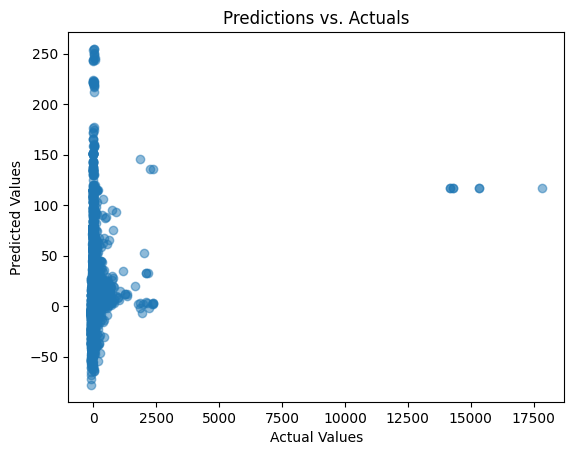

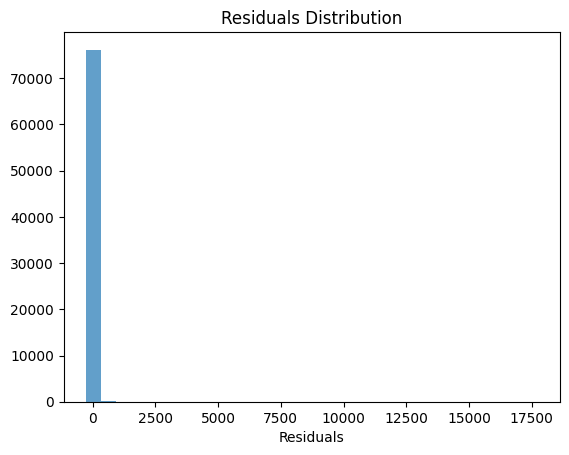

In [83]:
import matplotlib.pyplot as plt

# Plot predictions vs. actuals
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predictions vs. Actuals")
plt.show()

# Plot residuals
residuals = y_test - y_test_pred
plt.hist(residuals, bins=30, alpha=0.7)
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.show()

<Figure size 1000x800 with 0 Axes>

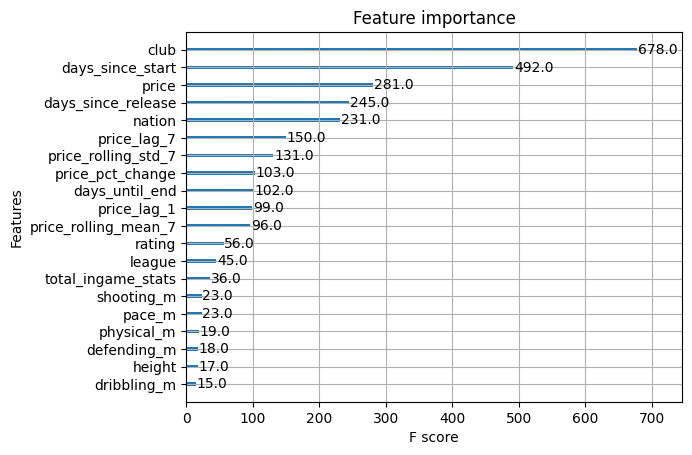

In [86]:
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(optimal_model, max_num_features=20)  # Show top 10 features
plt.show()

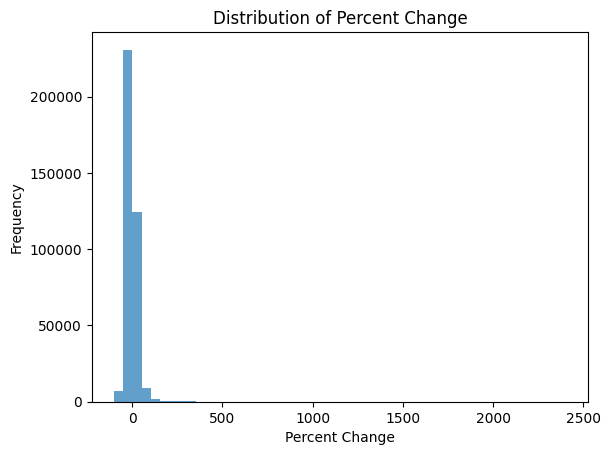

In [89]:
import matplotlib.pyplot as plt

# Plot the target distribution
plt.hist(y_train, bins=50, alpha=0.7)
plt.xlabel("Percent Change")
plt.ylabel("Frequency")
plt.title("Distribution of Percent Change")
plt.show()


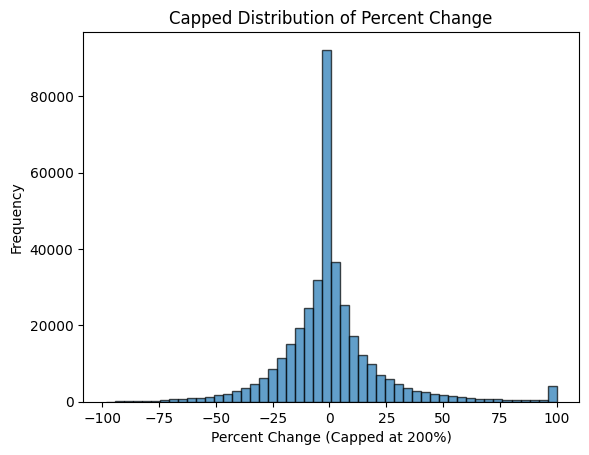

In [95]:
# Define a cutoff
cutoff = 100 

# Filter the data
y_train_capped = y_train.clip(upper=cutoff)

# Plot the capped distribution
plt.hist(y_train_capped, bins=50, alpha=0.7, edgecolor='k')
plt.xlabel("Percent Change (Capped at 200%)")
plt.ylabel("Frequency")
plt.title("Capped Distribution of Percent Change")
plt.show()


In [149]:
# Cap percent_change_7_days at 110%
cutoff = 110
y_train_capped = y_train.clip(upper=cutoff)
y_val_capped = y_val.clip(upper=cutoff)
y_test_capped = y_test.clip(upper=cutoff)

# Verify the capped target values
print(y_train_capped.describe())

count    732714.000000
mean          0.959192
std          24.451817
min         -98.529139
25%          -9.208125
50%           0.000000
75%           7.136935
max         110.000000
Name: percent_change_7_days, dtype: float64


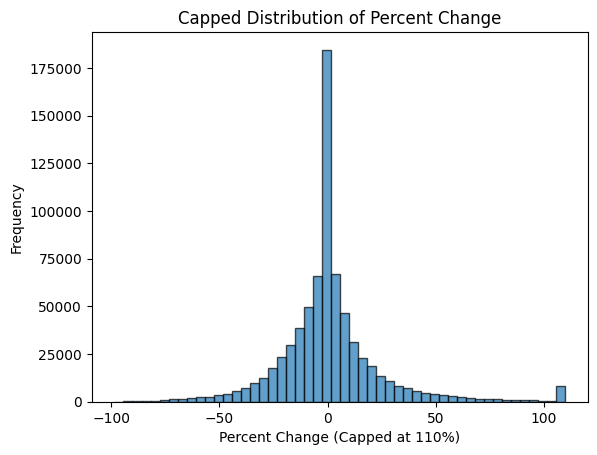

In [150]:
import matplotlib.pyplot as plt

# Plot capped distribution
plt.hist(y_train_capped, bins=50, alpha=0.7, edgecolor='k')
plt.xlabel("Percent Change (Capped at 110%)")
plt.ylabel("Frequency")
plt.title("Capped Distribution of Percent Change")
plt.show()

In [153]:
# Train the model
xgb_model.fit(
    X_train,
    y_train_capped,
    eval_set=[(X_val, y_val_capped)],  # Validation set
    verbose=True               # Print training progress
)

[0]	validation_0-rmse:23.39394
[1]	validation_0-rmse:23.20301
[2]	validation_0-rmse:23.05009
[3]	validation_0-rmse:22.91934
[4]	validation_0-rmse:22.79351
[5]	validation_0-rmse:22.68600
[6]	validation_0-rmse:22.57310
[7]	validation_0-rmse:22.47406
[8]	validation_0-rmse:22.35810
[9]	validation_0-rmse:22.26503
[10]	validation_0-rmse:22.14220
[11]	validation_0-rmse:22.05757
[12]	validation_0-rmse:21.95874
[13]	validation_0-rmse:21.88652
[14]	validation_0-rmse:21.81815
[15]	validation_0-rmse:21.78024
[16]	validation_0-rmse:21.71496
[17]	validation_0-rmse:21.67905
[18]	validation_0-rmse:21.63325
[19]	validation_0-rmse:21.59957
[20]	validation_0-rmse:21.54402
[21]	validation_0-rmse:21.49558
[22]	validation_0-rmse:21.46827
[23]	validation_0-rmse:21.41709
[24]	validation_0-rmse:21.39580
[25]	validation_0-rmse:21.35701
[26]	validation_0-rmse:21.32854
[27]	validation_0-rmse:21.29747
[28]	validation_0-rmse:21.28758
[29]	validation_0-rmse:21.26429
[30]	validation_0-rmse:21.25676
[31]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [154]:
# Access validation results
evals_result = xgb_model.evals_result()
validation_rmse = evals_result['validation_0']['rmse']

In [155]:
# Find the round with the lowest validation RMSE
best_round = np.argmin(validation_rmse)
best_val_rmse = validation_rmse[best_round]

print(f"Best Boosting Round: {best_round + 1}")
print(f"Validation RMSE at Best Round: {best_val_rmse:.4f}")

Best Boosting Round: 291
Validation RMSE at Best Round: 19.7523


In [156]:
# Retrain the model with the best boosting round
optimal_model = XGBRegressor(
    enable_categorical=True,  # Required for handling 'category' dtypes
    n_estimators=291,        # Use the optimal number of boosting rounds
    learning_rate=0.1,      # Same learning rate
    max_depth=6,            # Same maximum depth
    random_state=42         # For reproducibility
)

In [157]:
# Train on the full training set (X_train and y_train)
optimal_model.fit(X_train, y_train_capped)

# Predict on the test set
y_test_pred = optimal_model.predict(X_test)

In [158]:
from sklearn.metrics import mean_squared_error

# Calculate test RMSE
test_rmse = np.sqrt(mean_squared_error(y_test_capped, y_test_pred))
print(f"Test RMSE: {test_rmse:.4f}")

Test RMSE: 21.1674


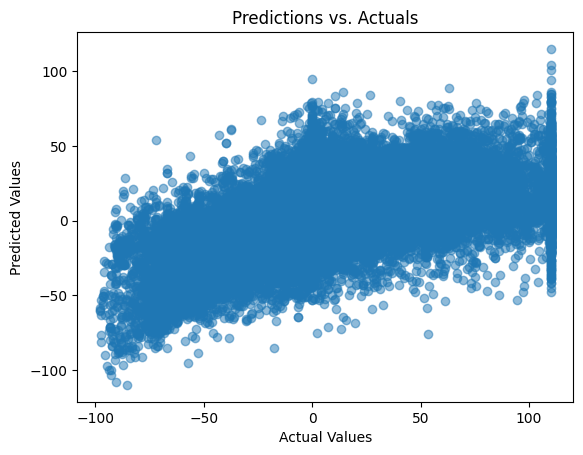

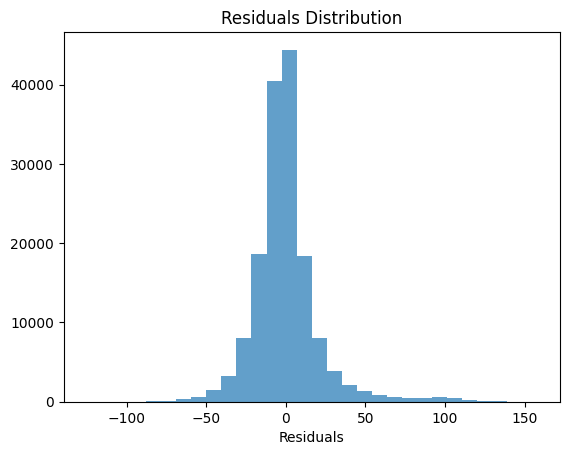

In [159]:
import matplotlib.pyplot as plt

# Plot predictions vs. actuals
plt.scatter(y_test_capped, y_test_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predictions vs. Actuals")
plt.show()

# Plot residuals
residuals = y_test_capped - y_test_pred
plt.hist(residuals, bins=30, alpha=0.7)
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.show()

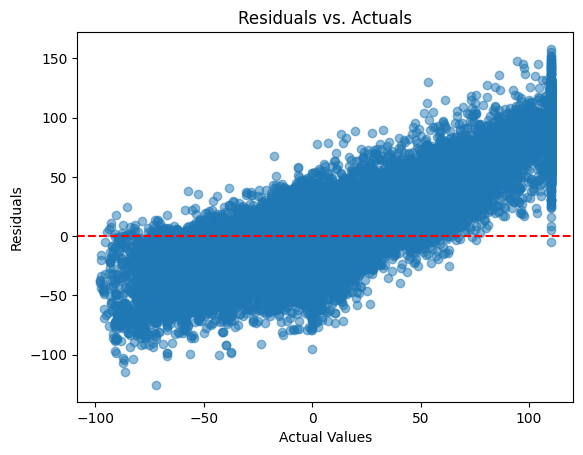

In [160]:
residuals = y_test_capped - y_test_pred
plt.scatter(y_test_capped, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Actuals")
plt.show()

In [161]:
import numpy as np

# Compute signs of actual and predicted values
actual_signs = np.sign(y_test_capped)
predicted_signs = np.sign(y_test_pred)

# Count the mismatched signs
wrong_signs = np.sum(actual_signs != predicted_signs)

# Calculate the percentage of wrong signs
wrong_sign_percentage = (wrong_signs / len(y_test_capped)) * 100

print(f"Percentage of Wrong Sign Predictions: {wrong_sign_percentage:.2f}%")

Percentage of Wrong Sign Predictions: 41.73%
